# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

- name - naziv putnika
- sex - spol putnika
- dob - dob putnika
- sibsp - broj braće/sestara/supružnika putnika na brodu
- parch - broj roditelja/djece putnika na brodu
- ticket - broj karte putnika
- fare - cijena karte putnika
- cabin - broj kabine putnika
- embarked - luka ukrcaja putnika

te izlaznu varijablu:

- survived - informacija je li putnik preživio katastrofu ili ne.


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
%matplotlib inline

In [301]:
data = pd.read_csv("Data/titanic.csv")
data.head(5)


,survived,surname,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.


In [302]:
print(data.survived.describe())

num_survivors = data["survived"].sum()
num_passengers = data["survived"].count()
survival_rate = (num_survivors / num_passengers) * 100
print("Survival rate: {:.2f}%".format(survival_rate))


count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64
Survival rate: 38.20%


Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.


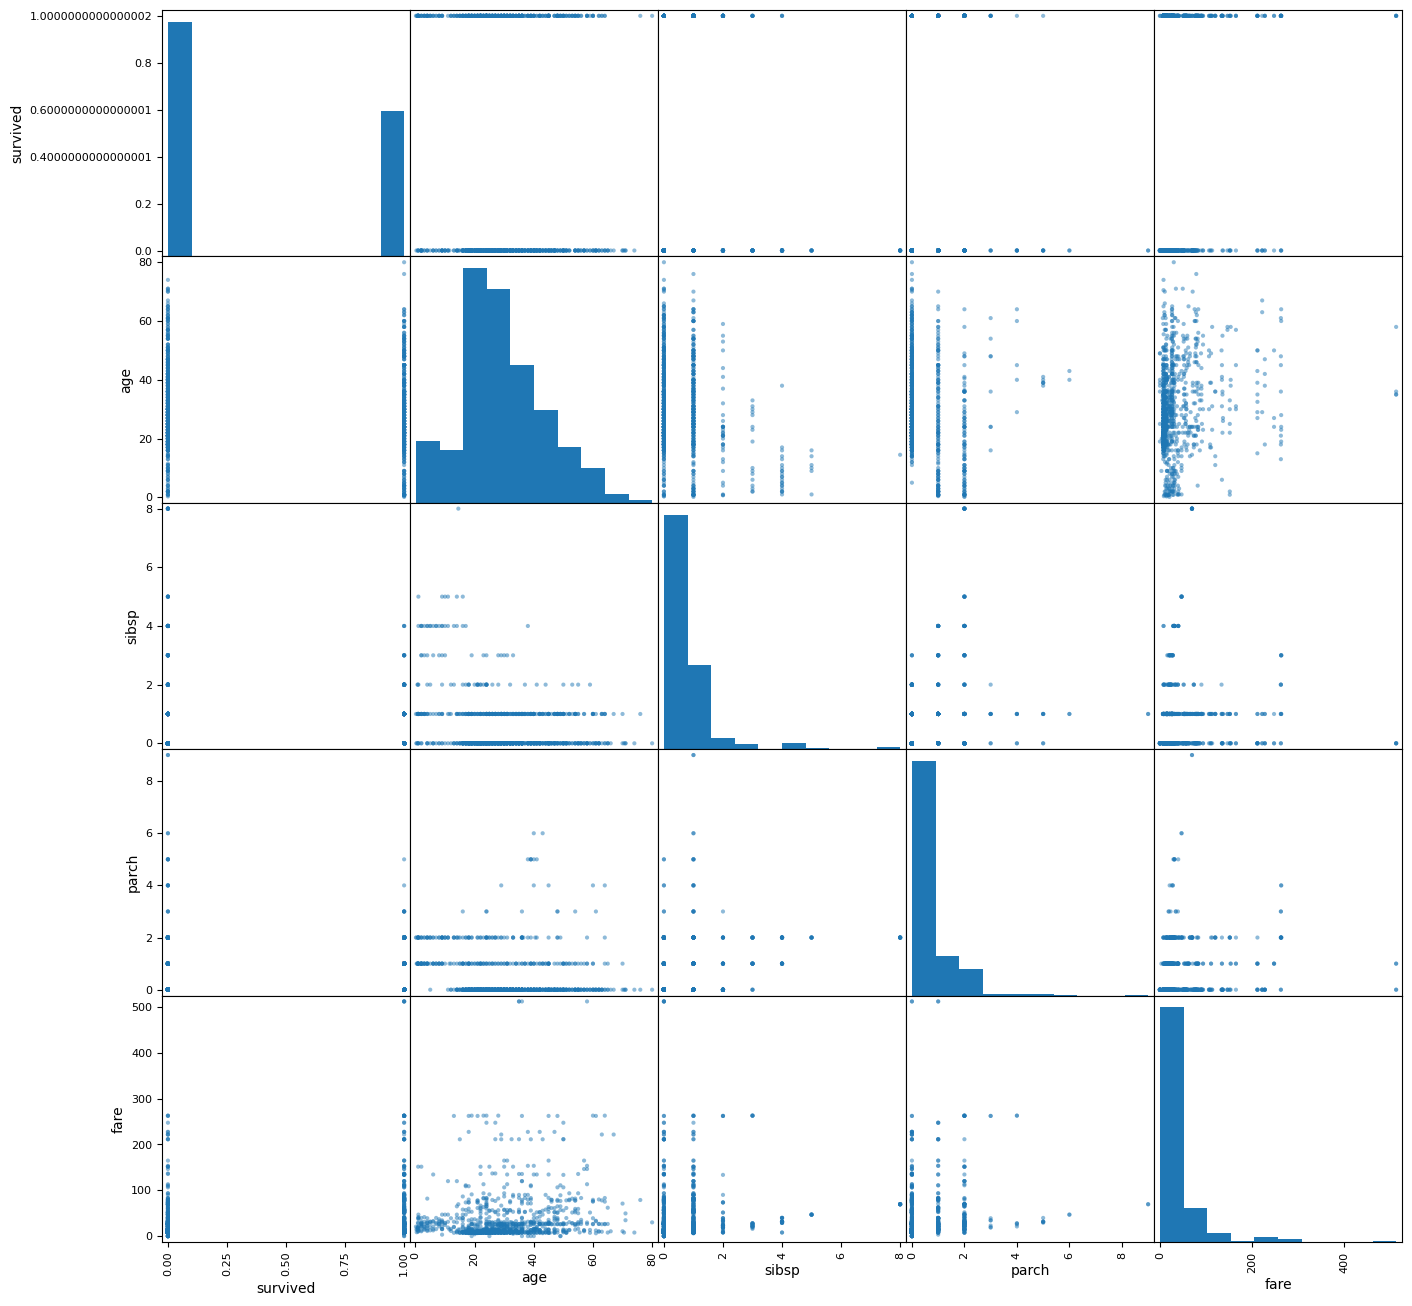

In [303]:
cols = ["survived", "age", "sibsp", "parch", "fare"]
pd.plotting.scatter_matrix(data[cols], figsize=(16, 16))
plt.show()


Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću _get_dummies()_ funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...).


In [304]:
titanic = pd.read_csv("Data/titanic.csv")

titanic["cabin"].fillna(titanic["cabin"].mode()[0],inplace=True)
titanic["age"].fillna(titanic["age"].mean(),inplace=True)

sex=pd.get_dummies(titanic["sex"])
cabin=pd.get_dummies(titanic["cabin"])

data = titanic[["age","sibsp","parch"]]
data = pd.concat([data,sex],axis=1)
data = pd.concat([data,cabin],axis=1)
data = pd.concat([data,titanic["survived"]],axis=1)
data.head()

,age,sibsp,parch,female,male,A10,A11,A14,A16,A18,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,survived
0,29.0000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.9167,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0000,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30.0000,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.0000,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.


In [305]:
from sklearn.model_selection import train_test_split

X=data.drop(["survived"],axis=1)
y=data["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


## **Zadatak 2: Logistička regresija**


Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.


/Users/lukakuterovac/Documents/Programming/faculty/data-analysis-exercises/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


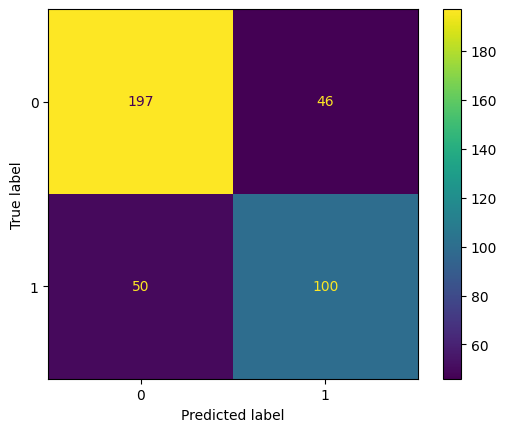

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (_predict_proba_). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC.


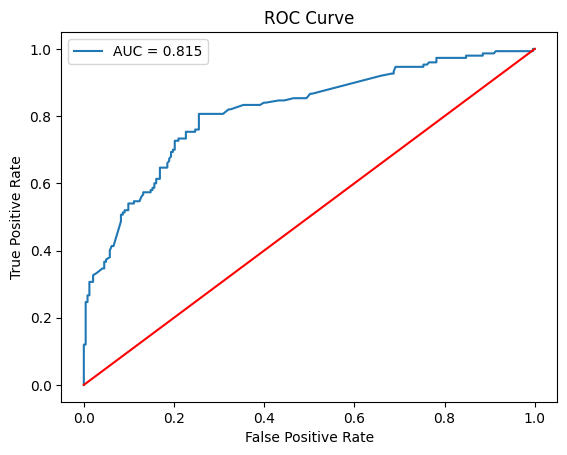

In [307]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='-', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.


In [308]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.834061135371179
Test accuracy: 0.7608142493638677
Train precision: 0.7675675675675676
Test precision: 0.6891891891891891
Train recall: 0.8114285714285714
Test recall: 0.68
Train F1: 0.7888888888888889
Test F1: 0.6845637583892618


Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.


In [309]:
svm = SVC(kernel="poly", degree=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.6266375545851528
Test accuracy: 0.6412213740458015
Train precision: 0.8333333333333334
Test precision: 1.0
Train recall: 0.02857142857142857
Test recall: 0.06
Train F1: 0.05524861878453038
Test F1: 0.11320754716981131


In [310]:
svm = SVC(kernel="poly", degree=3)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.6495633187772926
Test accuracy: 0.6819338422391857
Train precision: 0.8085106382978723
Test precision: 0.8787878787878788
Train recall: 0.10857142857142857
Test recall: 0.19333333333333333
Train F1: 0.19143576826196473
Test F1: 0.31693989071038253


In [311]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.631004366812227
Test accuracy: 0.638676844783715
Train precision: 0.6153846153846154
Test precision: 0.75
Train recall: 0.09142857142857143
Test recall: 0.08
Train F1: 0.15920398009950248
Test F1: 0.14457831325301204


Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate.


In [312]:
svm = SVC(kernel="rbf", C=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.7292576419213974
Test accuracy: 0.6997455470737913
Train precision: 0.8493150684931506
Test precision: 0.7580645161290323
Train recall: 0.35428571428571426
Test recall: 0.31333333333333335
Train F1: 0.5
Test F1: 0.4433962264150944


In [313]:
svm = SVC(kernel="rbf", C=4)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.7925764192139738
Test accuracy: 0.7684478371501272
Train precision: 0.7424242424242424
Test precision: 0.7092198581560284
Train recall: 0.7
Test recall: 0.6666666666666666
Train F1: 0.7205882352941176
Test F1: 0.6872852233676976


## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.


In [314]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier()
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.8122270742358079
Test accuracy: 0.7786259541984732
Train precision: 0.8006756756756757
Test precision: 0.7441860465116279
Train recall: 0.6771428571428572
Test recall: 0.64
Train F1: 0.7337461300309597
Test F1: 0.6881720430107526


In [315]:
knm = KNeighborsClassifier(n_neighbors=3)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.8384279475982532
Test accuracy: 0.7811704834605598
Train precision: 0.8366666666666667
Test precision: 0.7461538461538462
Train recall: 0.7171428571428572
Test recall: 0.6466666666666666
Train F1: 0.7723076923076924
Test F1: 0.6928571428571428


In [316]:
knm = KNeighborsClassifier(n_neighbors=10)
knm.fit(X_train, y_train)

y_train_pred = knm.predict(X_train)
y_test_pred = knm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.7860262008733624
Test accuracy: 0.7480916030534351
Train precision: 0.7873134328358209
Test precision: 0.717948717948718
Train recall: 0.6028571428571429
Test recall: 0.56
Train F1: 0.6828478964401293
Test F1: 0.6292134831460674


Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.


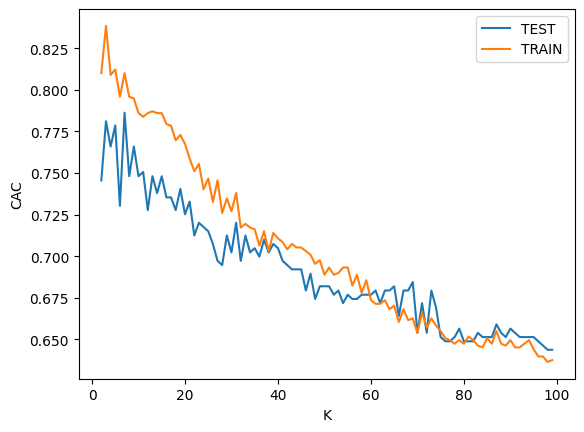

In [317]:
K = range(2,100)
cac_test = []
cac_train = []

for k in K:
    knm = KNeighborsClassifier(n_neighbors=k)
    knm.fit(X_train, y_train)
    y_train_pred = knm.predict(X_train)
    y_test_pred = knm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(K,cac_test,label="TEST")
plt.plot(K,cac_train,label="TRAIN")
plt.xlabel("K")
plt.ylabel("CAC")
plt.legend()
plt.show()

## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.


In [318]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_depth=2)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.7838427947598253
Test accuracy: 0.7709923664122137
Train precision: 0.7345679012345679
Test precision: 0.7112676056338029
Train recall: 0.68
Test recall: 0.6733333333333333
Train F1: 0.7062314540059347
Test F1: 0.6917808219178082


In [319]:
dtm = DecisionTreeClassifier(max_depth=5)
dtm.fit(X_train, y_train)

y_train_pred = dtm.predict(X_train)
y_test_pred = dtm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)


Train accuracy: 0.8231441048034934
Test accuracy: 0.7989821882951654
Train precision: 0.7974683544303798
Test precision: 0.7553956834532374
Train recall: 0.72
Test recall: 0.7
Train F1: 0.7567567567567568
Test F1: 0.7266435986159169


Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.


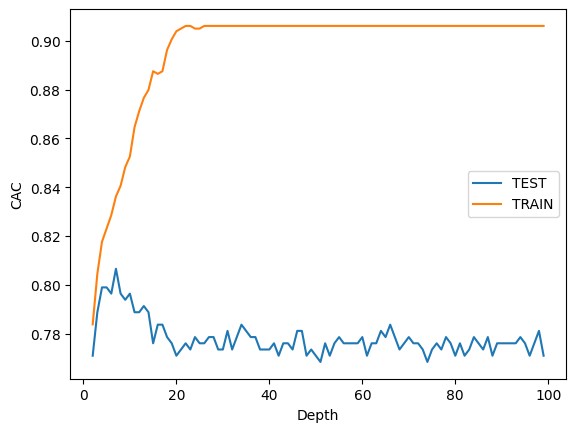

In [320]:
Depth = range(2,100)
cac_test = []
cac_train = []

for d in Depth:
    dtm = DecisionTreeClassifier(max_depth=d)
    dtm.fit(X_train, y_train)
    y_train_pred = dtm.predict(X_train)
    y_test_pred = dtm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(Depth,cac_test,label="TEST")
plt.plot(Depth,cac_train,label="TRAIN")
plt.xlabel("Depth")
plt.ylabel("CAC")
plt.legend()
plt.show()